## Observations and Insights 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combine_mouseid = pd.merge(study_results, mouse_metadata,
                         how= 'left', on= 'Mouse ID')
combine_mouseid.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [21]:
# Checking the number of mice in the DataFrame.
checking_mouse= len(combine_mouseid["Mouse ID"].unique())
checking_mouse


249

In [22]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Use DataFrame.duplicated 

duplicated_ID= combine_mouseid.loc[combine_mouseid.duplicated(['Mouse ID', 'Timepoint'])].copy()

duplicated_ID["Mouse ID"].unique()


array(['g989'], dtype=object)

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combine_mouseid = combine_mouseid.loc[~combine_mouseid['Mouse ID'].isin(duplicated_ID["Mouse ID"].unique())]
combine_mouseid.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [25]:
# Checking the number of mice in the clean DataFrame.
combine_mouseid["Mouse ID"].nunique()


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

group_data = combine_mouseid.groupby(["Drug Regimen"])
group_data

mean = group_data["Tumor Volume (mm3)"].mean()
median = group_data["Tumor Volume (mm3)"].median()
variance = group_data["Tumor Volume (mm3)"].var()
std_deviation = group_data["Tumor Volume (mm3)"].std()
SEM = group_data["Tumor Volume (mm3)"].sem()

summary_stat_table = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median,
                                  "Tumor Volume Variance":variance, "Tumor Std Deviation":std_deviation,
                                  "Tumor Volume Std. Err.":SEM})
summary_stat_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Std Deviation,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

group_data = combine_mouseid.groupby(["Drug Regimen"])
group_data

mean = group_data["Tumor Volume (mm3)"].mean()
median = group_data["Tumor Volume (mm3)"].median()
variance = group_data["Tumor Volume (mm3)"].var()
std_deviation = group_data["Tumor Volume (mm3)"].std()
SEM = group_data["Tumor Volume (mm3)"].sem()

summary_stat_table = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median,
                                  "Tumor Volume Variance":variance, "Tumor Std Deviation":std_deviation,
                                  "Tumor Volume Std. Err.":SEM})
summary_stat_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Std Deviation,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

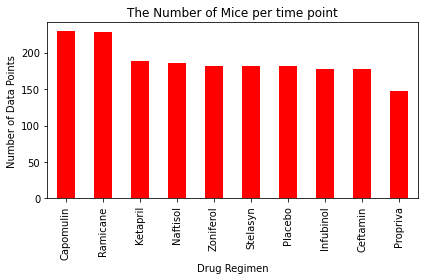

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
number_mice = combine_mouseid["Drug Regimen"].value_counts()
number_mice.plot(kind="bar", facecolor="red")

plt.title("The Number of Mice per time point")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

plt.tight_layout()
plt.show()



In [34]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
treatment = combine_mouseid["Drug Regimen"].value_counts()
treatment

# Create an array that contains the number of drug types numbers each has
drug_types_numbers = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]
x_axis = np.arange(0,len(drug_types_numbers),1)

# drug_types_numbers is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, drug_types_numbers, color='b', alpha=0.5, align="center")

# Tell matplotlib where we would like to place each of our x axis headers
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", 
                            "Infubinol", "Propriva"])

# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

plt.title("The Number of Mice per time point")
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")

plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

## Pie Plots

([<matplotlib.patches.Wedge at 0x2461ed69be0>,
 [Text(0.013934097579311265, 1.0999117423341975, 'Females'),
  Text(-0.0139340975793114, -1.0999117423341975, 'Males')],
 [Text(0.007600416861442507, 0.5999518594550168, '49.6%'),
  Text(-0.007600416861442581, -0.5999518594550168, '50.4%')])

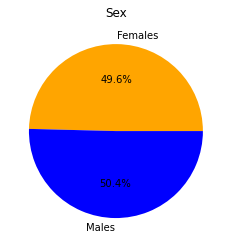

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#Split the mice between male and female
number_mice = combine_mouseid[["Mouse ID", "Sex"]]
number_mice = number_mice.drop_duplicates("Mouse ID")
number_mice

# Labels for the sections of our pie chart
labels = ["Females", "Males"]

# The values of each section of the pie chart
sizes = [123, 125]

# The colors of each section of the pie chart
colors = ["orange", "blue"]

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.title("Sex")
plt.pie(sizes,labels=labels, colors=colors,
        autopct="%1.1f%%")


In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [53]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [55]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [57]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
